<span style="font-size:10pt">AI & ML@DDD (Dumas Department Day) /September 2023, 22 /  v1.0  - CC BY-SA 4.0 Jean-Luc CHARLES (Jean-Luc.charles@mailo.com)</span>

# Machine learning with tensorflow2/keras Python modules:

# Training a Convolutional Neural Network to classify material micrographs

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal">
     It is fundamental to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for each important Python project: a PVE makes it possible to control for each project the versions of the Python interpreter and “sensitive” modules (like tensorflow for example).
    
$\leadsto$ This notebook must be run under the __dumas1__ PVE.

<a name="top"></a>
## [ 1 - The image files in the directory ../Data](#1)
## [ 2 - Preprocessing of the images](#2)
## [ 3 - Prepare the _train_ data set and the _test_ data set](#3)
## [ 4 - Build the convolutional neural network](#4)
## [ 5 - Train the network](#5)
## [ 6 - Evaluate the trained network](#6)

## Import the required Python modules

In [1]:
# suppress tensorflow verbose warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import sys, random, cv2
import matplotlib.pyplot as plt

# specific modules:
from utils.tools import scan_dir, plot_loss_accuracy

In [3]:
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} with keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.18
tensorflow: 2.9.1 with keras 2.9.0
numpy     : 1.22.3
OpenCV    : 4.6.0


In [4]:
# allows to visualize the graphs directly in the cell of the N.B.
%matplotlib inline

# SEED will be used to fix the _seed_ of the random generators to have continuations
# of repeatable random numbers
SEED = 11

[top](#top)

## 1 $-$ The image files in the directory ../Data  <a name="1"></a>

The directory `Data` is in the root directory containing the image files, we can use the functions of the `os` module to have a look:

In [5]:
os.listdir('..')

['Data',
 'Slides',
 'PVE_install',
 'LICENSE',
 '.gitignore',
 'Notebooks',
 'README.md',
 'dumas1.yml',
 '.git',
 'SandBox',
 'data_bank_RESA.zip',
 'dumas1.txt']

In [6]:
data_subdirs = sorted(os.listdir('../Data'))
data_subdirs

['0-Hypoeutectoid steel',
 '1-Hypoeutectic white cast iron',
 '2-Hypereutectoid Steel']

Now let's define `files` as the list of the image file list of the 3 image directories:

In [7]:
all_files = []
for subdir in data_subdirs:
    files = sorted([f for f in os.listdir('../Data/' + subdir) if f.lower().endswith('.jpg')])
    all_files.append(files)

In [8]:
i = 0
print(f"{len(all_files[i])} files in <{data_subdirs[i]}>:")
all_files[i]

106 files in <0-Hypoeutectoid steel>:


['X24-000000.jpg',
 'X24-000001.jpg',
 'X24-000002.jpg',
 'X24-000003.jpg',
 'X24-000004.jpg',
 'X24-000005.jpg',
 'X24-000006.jpg',
 'X24-000007.jpg',
 'X24-000008.jpg',
 'X24-000009.jpg',
 'X24-000010.jpg',
 'X24-000011.jpg',
 'X24-000012.jpg',
 'X24-000013.jpg',
 'X24-000014.jpg',
 'X24-000015.jpg',
 'X24-000016.jpg',
 'X24-000017.jpg',
 'X24-000018.jpg',
 'X24-000019.jpg',
 'X24-000020.jpg',
 'X24-000021.jpg',
 'X24-000022.jpg',
 'X24-000023.jpg',
 'X24-000024.jpg',
 'X24-000025.jpg',
 'X24-000026.jpg',
 'X24-000027.jpg',
 'X24-000028.jpg',
 'X24-000029.jpg',
 'X24-000030.jpg',
 'X24-000031.jpg',
 'X24-000032.jpg',
 'X24-000033.jpg',
 'X24-000034.jpg',
 'X24-000035.jpg',
 'X24-000036.jpg',
 'X24-000037.jpg',
 'X24-000038.jpg',
 'X24-000039.jpg',
 'X24-000040.jpg',
 'X24-000041.jpg',
 'X24-000042.jpg',
 'X24-000043.jpg',
 'X24-000044.jpg',
 'X24-000045.jpg',
 'X24-000046.jpg',
 'X24-000047.jpg',
 'X24-000048.jpg',
 'X24-000049.jpg',
 'X24-000050.jpg',
 'X24-000051.jpg',
 'X24-000052

In [9]:
i = 1
print(f"{len(all_files[i])} files in <{data_subdirs[i]}>:")
all_files[i]

107 files in <1-Hypoeutectic white cast iron>:


['M7_000000.jpg',
 'M7_000001.jpg',
 'M7_000002.jpg',
 'M7_000003.jpg',
 'M7_000004.jpg',
 'M7_000005.jpg',
 'M7_000006.jpg',
 'M7_000007.jpg',
 'M7_000008.jpg',
 'M7_000009.jpg',
 'M7_000010.jpg',
 'M7_000011.jpg',
 'M7_000012.jpg',
 'M7_000013.jpg',
 'M7_000014.jpg',
 'M7_000015.jpg',
 'M7_000016.jpg',
 'M7_000017.jpg',
 'M7_000018.jpg',
 'M7_000019.jpg',
 'M7_000020.jpg',
 'M7_000021.jpg',
 'M7_000022.jpg',
 'M7_000023.jpg',
 'M7_000024.jpg',
 'M7_000025.jpg',
 'M7_000026.jpg',
 'M7_000027.jpg',
 'M7_000028.jpg',
 'M7_000029.jpg',
 'M7_000030.jpg',
 'M7_000031.jpg',
 'M7_000032.jpg',
 'M7_000033.jpg',
 'M7_000034.jpg',
 'M7_000035.jpg',
 'M7_000036.jpg',
 'M7_000037.jpg',
 'M7_000038.jpg',
 'M7_000039.jpg',
 'M7_000040.jpg',
 'M7_000041.jpg',
 'M7_000042.jpg',
 'M7_000043.jpg',
 'M7_000044.jpg',
 'M7_000045.jpg',
 'M7_000046.jpg',
 'M7_000047.jpg',
 'M7_000048.jpg',
 'M7_000049.jpg',
 'M7_000050.jpg',
 'M7_000051.jpg',
 'M7_000052.jpg',
 'M7_000053.jpg',
 'M7_000054.jpg',
 'M7_00005

In [10]:
i = 2
print(f"{len(all_files[i])} files in <{data_subdirs[i]}>:")
all_files[i]

107 files in <2-Hypereutectoid Steel>:


['X20_000000.jpg',
 'X20_000001.jpg',
 'X20_000002.jpg',
 'X20_000003.jpg',
 'X20_000004.jpg',
 'X20_000005.jpg',
 'X20_000006.jpg',
 'X20_000007.jpg',
 'X20_000008.jpg',
 'X20_000009.jpg',
 'X20_000010.jpg',
 'X20_000011.jpg',
 'X20_000012.jpg',
 'X20_000013.jpg',
 'X20_000014.jpg',
 'X20_000015.jpg',
 'X20_000016.jpg',
 'X20_000017.jpg',
 'X20_000018.jpg',
 'X20_000019.jpg',
 'X20_000020.jpg',
 'X20_000021.jpg',
 'X20_000022.jpg',
 'X20_000023.jpg',
 'X20_000024.jpg',
 'X20_000025.jpg',
 'X20_000026.jpg',
 'X20_000027.jpg',
 'X20_000028.jpg',
 'X20_000029.jpg',
 'X20_000030.jpg',
 'X20_000031.jpg',
 'X20_000032.jpg',
 'X20_000033.jpg',
 'X20_000034.jpg',
 'X20_000035.jpg',
 'X20_000036.jpg',
 'X20_000037.jpg',
 'X20_000038.jpg',
 'X20_000039.jpg',
 'X20_000040.jpg',
 'X20_000041.jpg',
 'X20_000042.jpg',
 'X20_000043.jpg',
 'X20_000044.jpg',
 'X20_000045.jpg',
 'X20_000046.jpg',
 'X20_000047.jpg',
 'X20_000048.jpg',
 'X20_000049.jpg',
 'X20_000050.jpg',
 'X20_000051.jpg',
 'X20_000052

### Check: display some images

Let's display the first JPG files in the three image directories: we read the JPG files with the function `imread` of the `openCV` module, wich returns a `ndarray` of the image pixels:

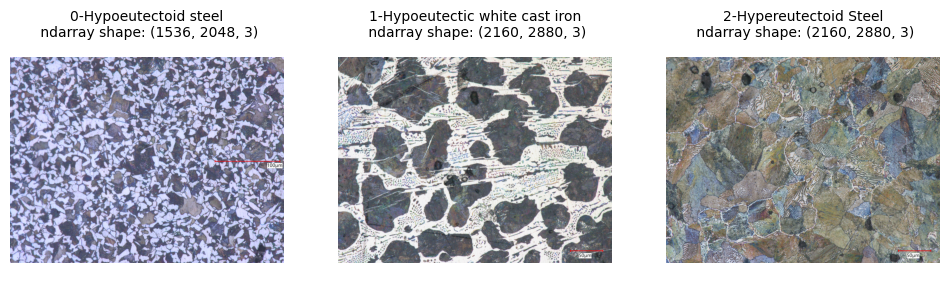

In [11]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches((12,3))

for subdir, file, axis in zip(data_subdirs, all_files, axes):
    # load the image file:
    imBGR = cv2.imread(os.path.join("../Data", subdir, file[0]))
    imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
    # display images:
    axis.imshow(imRGB)
    axis.set_title(f'{subdir}\n ndarray shape: {imRGB.shape}', fontsize=10) 
    axis.axis('off')
    axis.axis('equal')

[top](#top)

## 2 $-$ Preprocessing of the images <a name="2"></a>

### Size
Before training a neural network to classify images, we must carefully look at the size of the images:
- all the images must have the same size
- the size of the images should not be too large if we want acceptable computation times...

$\leadsto$ the micrographs available are high resolution images ( 2048$\times$1536 and80$\times$2160$ ): we will lower he size to __(800, 600)__ with the fucntion `resize` of the `openCV` module.

### _RGB_  or _gray tones_
If the color information of the images is not relevant for their classification, we can gain calculation time and minimize the memory footprint by converting the images into gray tones.

$\leadsto$ As the color is not the main classification information, we will convert the RGB images into to gray-tone images with the `cvtColor` function of OpenCV.

### Example:

Let's resize and convert in gray the first images of the three image directories:

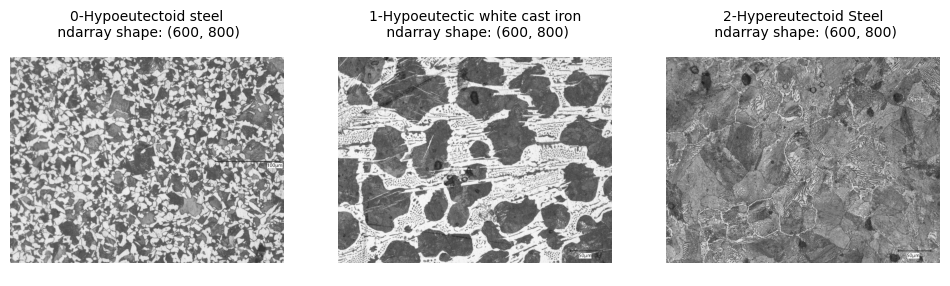

In [12]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches((12,3))

for subdir, file, axis in zip(data_subdirs, all_files, axes):
    # load the image file:
    img = cv2.imread(os.path.join("../Data", subdir, file[0]))
    # convert color image into grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, dsize=(800, 600))    # new size given as: (width, height)
    axis.imshow(img, cmap='gray')
    axis.set_title(f'{subdir}\n ndarray shape: {img.shape}', fontsize=10) 
    axis.axis('off')
    axis.axis('equal')

### Loading all the images

After all, we load the images (resized and converted in gray tone into a single `ndarray`:

In [13]:
images, labels = [], []

# define data_subdirs: the subdirectories in "../Data":
image_dir = "../Data"
data_subdirs = os.listdir(image_dir)
data_subdirs.sort()

# define label_text as the names of the subdirs:
label_text = data_subdirs

# define label_rank to get labels as numbers:
label_rank = range(len(data_subdirs))

for d, lab  in zip(data_subdirs, label_rank):
    print(f'\nLabel:{lab}, material:[{d}]')
    
    files = os.listdir(os.path.join('../Data', d))
    files.sort()
    for f in files:
        print(f'\r\treading file {f}', end='')
        
        image_path = os.path.join('../Data', d, f)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
        img = cv2.resize(img, dsize=(800, 600))    # new size given as: (width, height)
        
        images.append(img)
        labels.append(lab)

    print(f'\rdone{40*" "}')
    
# convert lists as ndarrays:    
images = np.array(images)
labels = np.array(labels)


Label:0, material:[0-Hypoeutectoid steel]
done                                        

Label:1, material:[1-Hypoeutectic white cast iron]
done                                        

Label:2, material:[2-Hypereutectoid Steel]
done                                        


In [14]:
label_text, list(label_rank)

(['0-Hypoeutectoid steel',
  '1-Hypoeutectic white cast iron',
  '2-Hypereutectoid Steel'],
 [0, 1, 2])

How many image in total:

In [15]:
len(images)

320

Check the size of the first and last images:

In [16]:
images[0].shape, images[-1].shape

((600, 800), (600, 800))

Summary:

In [17]:
print(f"'images' ndarray -> shape: {images.shape}, dtype: {images.dtype}")
print(f"'labels' ndarray -> shape: {labels.shape}, dtype: {labels.dtype}")
print(f"total size of 'images' ndarray in memory: {images.size/1024/1024:.1f} MB")

'images' ndarray -> shape: (320, 600, 800), dtype: uint8
'labels' ndarray -> shape: (320,), dtype: int32
total size of 'images' ndarray in memory: 146.5 MB


[top](#top)

## 3 $-$ Prepare the _train_ data set and the _test_ data set <a name="3"></a>

Thanks to the `train_test_split` function of the `sklearn` module we can split the `images` and `labels` ndarrays into a `train` dataset (for the training) and a `test` dataset (for testing).<br>
Images and labels are randomly selected but respecting the proportion of each of the 3 classes in the original dataset (this is the interest of the `stratify` argument of the `train_test_split` function):

In [18]:
from sklearn.model_selection import train_test_split

im_train, im_test, lab_train, lab_test = train_test_split(images, labels,
                                                          stratify=labels,  # use labels to evenly distribute all 
                                                                            # classes in the train and test dadasets
                                                          test_size=0.15,   # 15 % test, 85% train 
                                                          random_state=SEED, 
                                                          shuffle=True)     # shuffe randomly the data

Check: display a train image randomy selected:

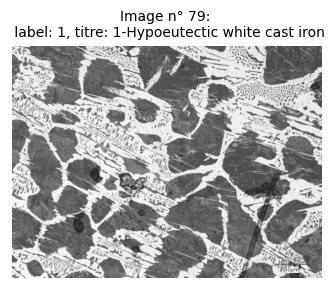

In [23]:
n_image = np.random.randint(0,len(im_train))

plt.figure(figsize=(4,4))
plt.imshow(im_train[n_image], cmap='gray')
plt.title(f'Image n° {n_image}: \n label: {lab_train[n_image]}, titre: {label_text[lab_train[n_image]]}',
          fontsize=10)
plt.axis('off');

### Data set parameters:

To avoid hard-coding the number of training and test images as well as the size of the images, these parameters are recovered from the data set:
- with the shape attribute of the `im_train` and `im_test` arrays
- with the size attribute of the first training image for example


In [24]:
# number of training images:
nb_im_train = im_train.shape[0]

# number of test images:
nb_im_test  = im_test.shape[0]     

# number of elements (pixels) of the firts training image: 
nb_pixel    = im_train[0].size   

# Visual checking:
print(f"{nb_im_train} training images and {nb_im_test} test images")
print(f"{im_train.shape[1]}x{im_train.shape[2]}={nb_pixel} pixels in each image")

# number of classes:
nb_classe = len(set(labels))
print(f"{nb_classe} different classes found in the `labels` ndarray")

272 training images and 48 test images
600x800=480000 pixels in each image
3 different classes found in the `labels` ndarray


### Updating the dimensions of the input data for the _keras_ module:

The convolutional layers of the *kera*s module expect 4-dimensional arrays `(batch_size, height, width, depth)` by default:
- `batch_size`: number of input images,
- `height` and `width`: height and width of images (in pixels),
- `depth`: depth of the arrays (`3` for an RGB image, `1` for a grayscale image).

The form of our images is:

In [21]:
im_train.shape, im_test.shape

((272, 600, 800), (48, 600, 800))

It is therefore necessary to add a dimension (equal to `1`) after the third dimension `800`, for example with the `reshape` method of the `ndarray` arrays of numpy, without forgetting to divide the arrays by 255 to __normalize__ them entries:

In [25]:
# avec  la méthode reshape des tableaux ndarray de numpy :
x_train = im_train.reshape(im_train.shape + (1,))/255
x_test  = im_test.reshape(im_test.shape + (1,))/255

Check:

In [26]:
im_train.shape, x_train.shape, x_train.min(), x_train.max(),

((272, 600, 800), (272, 600, 800, 1), 0.0, 1.0)

In [24]:
im_test.shape, x_test.shape, x_test.min(), x_test.max()

((48, 600, 800), (48, 600, 800, 1), 0.0, 1.0)

### One-hot formatting of labels

The labels data must be given as an array of vectors one-hot coding the integer value of the labels: we us 

In [27]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' of the train and test labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Check: display the first 10 values of `lab_train` and `y_train` :

In [28]:
print(lab_train[:10])
print(y_train[:10])

[0 1 2 2 2 1 0 0 2 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


[top](#top)

## 4 $-$ Build the convolutional neural network <a name="4"></a>

### 4.1 $-$ The convolution operation

### Extracting features from an image with a convolution filter

The convolution of an image by a filter (also called kernel, *kernel*) consists of moving a _small 2D window_ (3x3, 5x5....) over the pixels of the image and calculating each time the _contracted tensor product_ between the elements of the filter and the pixels of the image delimited by the filter window (sum of the products term by term).<br>

The animation below illustrates the convolution of a 5x5 image by a 3x3 filter without *padding* on the edges: we obtain a new, smaller image of 3x3 pixels<br>
<p style="text-align:center; font-style:italic; font-size:12px;">
     <img src="img/filter_3x3.png" width="80" style="display:inline-block;">
     <img src="img/Convolution_schematic.gif" width="300" style="display:inline-block;"><br>
     [image credit: <a href="http://deeplearning.stanford.edu/tutorial">Stanford deep learning tutorial</A>]
</p>

To maintain the size of the input image, we can use a *padding* technique to create new data on the edges of the image (by duplicating data on the edges, or adding rows and columns of 0... for example):

<p style="text-align:center; font-style:italic; font-size:12px;">
     <img src="img/padding.gif" width="350"><br>
     [image credit: <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2">Arden Dertat</a> ]
</p>

The goal of convolution is to extract features present in the source image: we speak of a “feature map” to designate the image produced by the convolution operation. The state of the art leads to using several convolutional filters to extract different characteristics: we can have up to several dozen convolutional filters in the same layer of the network which generate as many _feature maps_, hence the increase in data created by these convolution operations...

#### Examples of feature extraction with known convolutional filters ([Prewitt filter](https://fr.wikipedia.org/wiki/Filtre_de_Prewitt)):

As an example, the figure below shows the *feature maps* obtained by convolving a MNIST image (a digit 7) with 4 3x3 filters well known in image processing (Prewitt filters for contour extraction) :

<p style="text-align:center; font-style:italic; font-size:12px;">
     <img src="img/7_mnist_4_filtres.png" width="500"><br>
     [image credit: JLC]
</p>

We see that these filters act as edge detection filters: in the output images, the whitest pixels constitute what the filters detected:
- filters (a) and (c) detect lower and upper horizontal contours,
- filters (b) and (d) detect right and left vertical contours.

These very simple examples allow you to understand how the extraction of *features* from an image using convolutional filtering works.

#### From the convolutional filter to the convolutional neuron layer

The integration of convolutional filtering into the structure of the neural network gives the following organization of calculations:

- Each convolutional filter has the same coefficients for the 3 colors: for the LeNet5 network for example, each of the 6 5x5x3 filters of the first layer has only 25 coefficients, identical for the colors R, G & B.

- Each unit (convolutional neuron) of a *feature map* of layer C1 receives 75 pixels (25 red pixels $R_i$, 25 green pixels $G_i$ and 25 blue pixels $B_i$) delimited by the position of the convolutional filter in the source image.

- The neuron $k$ of a *feature map* calculates an output $y_k = F_a(\sum_{i=1}^{25}{\omega_i(R_i + G_i + B_i) - b_k})$, where $ b_k$ is the bias of the neuron $k$ and $F_a$ the activation function (very often `relu`).

- for the 6 convolutional filters of layer C1, we therefore have 6 x (25 + 1) parameters, i.e. 156 unknown parameters for this layer which will be determined by training the network.

The same pattern is used in all convolutional layers.

### 4.2 $-$ Reducing the amount of information with _pooling_

*pooling* aims to reduce the amount of data to be processed. As for the convolution operation, we move a filter over the elements of the *feature map* array and at each position of the filter, we calculate a number representing all the elements selected in the filter (the maximum value, or the average....). But unlike convolution, we move the filter without overlap.<br>
In the simplified example below, the *max spool* filter transforms the 8x8 matrix into a 4x4 matrix which describes "roughly" the same information but with less data:
<p style="text-align:center; font-style:italic; font-size:12px;">
     <img src="img/max_pool_2x2.png" width="350"><br>
     [image credit: JLC</a> ]
</p>

### 4.3 $-$ Build the "LeNet5 CNN"  with tensorflow/keras

We build a convolutional NN similar to __LeNet5__ introduced in the research paper “Gradient-Based Learning Applied To Document Recognition” in 1998 by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffnerfrom.
LeNet5 was originally designed for 32$\times$32 images:

![img/LeNet5.png](img/LeNet5.png)

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D,  MaxPool2D, Flatten

# fix the seed of the random generators used by tensorflow:
tf.random.set_seed(SEED)

model = Sequential(name='LeNet5')

# A layer to give the 4 dimensions of the input data:
model.add(Input(shape=x_train[0].shape))

# Layer C1: 6 convolution filters of 5x5 with padding and 'relu' activation function:
model.add(Conv2D(6, kernel_size=5, padding='same', activation='relu', name='C1'))

# Layer S2: 'maximum' poolling stage, with 2x2:
model.add(MaxPool2D(pool_size=2, name='S2'))

# Layer C3: 16 convolution filters of 5x5 with padding and 'relu' activation function:
model.add(Conv2D(16, kernel_size=5, padding='valid', activation='relu', name='C3'))

# Layer S4: 'maximum' poolling stage, with 2x2:
model.add(MaxPool2D(pool_size=2, name='S4'))

# Layer C5: 120 convolution filters of 5x5 with padding and 'relu' activation function:
model.add(Conv2D(120, kernel_size=5, padding='valid', activation='relu', name='C5'))

# Flatten the images into a single vector with all the pixels:
model.add(Flatten())

# F6: dense layer with 84 neurones and 'relu' activation function:
model.add(Dense(84, activation='relu', name='F6'))

# Output: final dense layer, with 'nb_classe'(3) neutones and the 'softmax' 
# ctivation function dedicated to classification training:
model.add(Dense(nb_classe, activation='softmax', name='Output'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "LeNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 600, 800, 6)       156       
                                                                 
 S2 (MaxPooling2D)           (None, 300, 400, 6)       0         
                                                                 
 C3 (Conv2D)                 (None, 296, 396, 16)      2416      
                                                                 
 S4 (MaxPooling2D)           (None, 148, 198, 16)      0         
                                                                 
 C5 (Conv2D)                 (None, 144, 194, 120)     48120     
                                                                 
 flatten (Flatten)           (None, 3352320)           0         
                                                                 
 F6 (Dense)                  (None, 84)                28159

### Save the initial state of the network (structure & data)

We can save the weights of the initial untrained network (random values) and its structure with the `model.save` method. <br>
This will be useful later to re-create the network to its initial state if we want to compare dirrefent trainings:

In [31]:
import os

# Check wether the 'model' exist and create it if not:
if not os.path.exists("models"): os.mkdir("models")

# save the structure and the initial waights of the network:
key = 'lenet5_init'
model.save('models/'+key)

# display the tree beginning at f'./models/{key}':
tree = scan_dir(f"./models/{key}")
print(f'\nFiles written:\n{tree}')

INFO:tensorflow:Assets written to: models/lenet5_init\assets


INFO:tensorflow:Assets written to: models/lenet5_init\assets



Files written:
./models/lenet5_init/keras_metadata.pb
./models/lenet5_init/saved_model.pb
./models/lenet5_init\variables/variables.index
./models/lenet5_init\variables/variables.data-00000-of-00001
./models/lenet5_init\assets/



[top](#top)

## 5 $-$ Train the network <a name="5"></a>

### Automatically stop training before over-fit
Keras offers tools to automatically stop learning by monitoring for example the growth of `val_accuracy` or the decrease of `val_loss` from one epoch to another (see the _EarlyStopping_ callback).

We can thus define a list of callback functions that we pass as an argument to the `fit` method with the agument named _callbacks_:

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# define the list of 'callback' fucntions:
callbacks_list = [
    EarlyStopping(monitor='val_accuracy',  # The parameter to monitor
                  patience=1,              # accept that 'val_accuracy' decrease 1 time
                  restore_best_weights=True,
                  verbose=1)
]

# define the key to reload the initial state & structure of the network:
key = 'lenet5_init'

# define the path to be used:
model_path = os.path.join('models', key)

# load the network structure & initial weights:
model = tf.keras.models.load_model(model_path)

# Deterministic tensorflow training: 
# see https://blog.tensorflow.org/2022/05/whats-new-in-tensorflow-29.html
tf.keras.utils.set_random_seed(SEED)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism() 

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=25,     # the total number of successive trainings
                 batch_size=10, # fragmentation of the whole dada set in batches
                 callbacks = callbacks_list)

Epoch 1/25
28/28 [==============================] - 41s 1s/step - loss: 4.5690 - accuracy: 0.4522 - val_loss: 0.8826 - val_accuracy: 0.3750
Epoch 2/25
28/28 [==============================] - 38s 1s/step - loss: 0.5575 - accuracy: 0.7647 - val_loss: 0.2719 - val_accuracy: 0.9375
Epoch 3/25
28/28 [==============================] - 39s 1s/step - loss: 0.1746 - accuracy: 0.9191 - val_loss: 0.0380 - val_accuracy: 0.9792
Epoch 4/25
28/28 [==============================] - 39s 1s/step - loss: 0.1313 - accuracy: 0.9412 - val_loss: 0.2479 - val_accuracy: 0.8333
Epoch 4: early stopping


### Display the `accuracy` and `loss` curves:

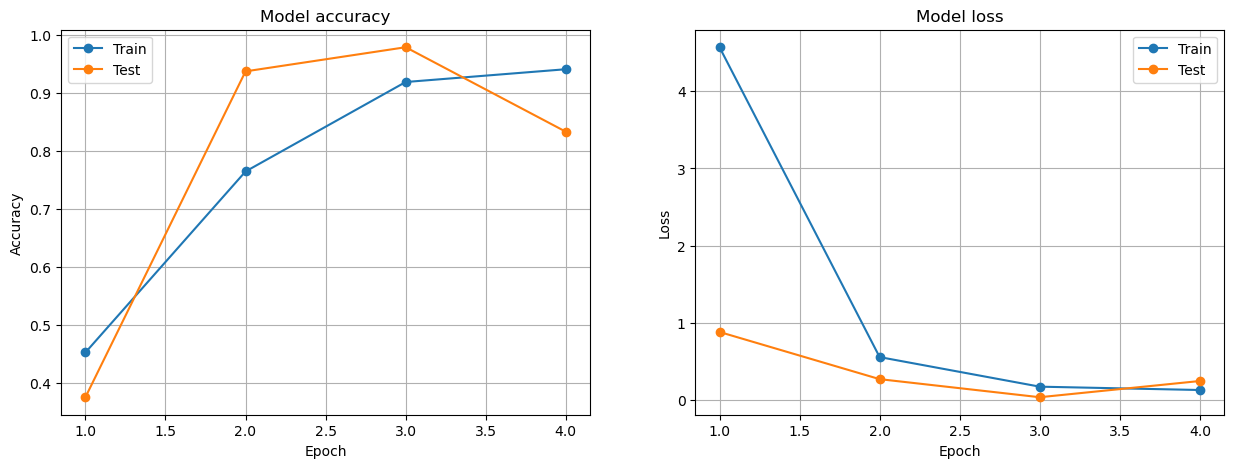

In [33]:
plot_loss_accuracy(hist)

### Save the structure and the weights of the trained network

In [34]:
import os

# save the structure and the trained weights of the network:
key = 'lenet5_trained_bs-10_ep-25_es-acc-1'
model.save('models/' + key)

# display the tree beginning at f'./models/{key}':
tree = scan_dir(f"./models/{key}")
print(f'\nFiles written:\n{tree}')

INFO:tensorflow:Assets written to: models/lenet5_trained_bs-10_ep-25_es-acc-1\assets


INFO:tensorflow:Assets written to: models/lenet5_trained_bs-10_ep-25_es-acc-1\assets



Files written:
./models/lenet5_trained_bs-10_ep-25_es-acc-1/keras_metadata.pb
./models/lenet5_trained_bs-10_ep-25_es-acc-1/saved_model.pb
./models/lenet5_trained_bs-10_ep-25_es-acc-1\variables/variables.index
./models/lenet5_trained_bs-10_ep-25_es-acc-1\variables/variables.data-00000-of-00001
./models/lenet5_trained_bs-10_ep-25_es-acc-1\assets/



[top](#top)

## 6 $-$ Evaluate the trained network <a name="6"></a>

### Show the confusion matrix

We explicitly reload the NN structure & trained weights, even if it is not necessary here, to show the Python syntaxe if needed (this cell could be skipped):

In [35]:
# define the key to load NN structure & trained weights:
key = 'lenet5_trained_bs-10_ep-25_es-acc-1'
# define the pat for the trained NN:
model_path = os.path.join('models', key)
# load the NN structure & trained weights:
model = tf.keras.models.load_model(model_path)

2/2 [==============================] - 1s 432ms/step


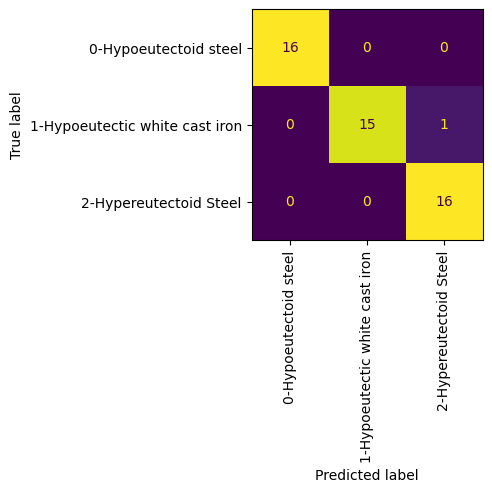

In [36]:
# compute the trained NN results for the test data set:
raw_results = model.predict(x_test)        # raw_results is an array of probabilities vectors
inferences  = raw_results.argmax(axis=-1)  # extract the highest probablities

from sklearn.metrics import ConfusionMatrixDisplay
fig  = plt.figure(figsize=(3,3))
axis = plt.axes()

ConfusionMatrixDisplay.from_predictions(lab_test, inferences, 
                                        ax=axis,
                                        display_labels=label_text, 
                                        xticks_rotation='vertical',
                                        colorbar=False);

### Look at the classification score for some test images:

1/1 [==============================] - 0s 77ms/step


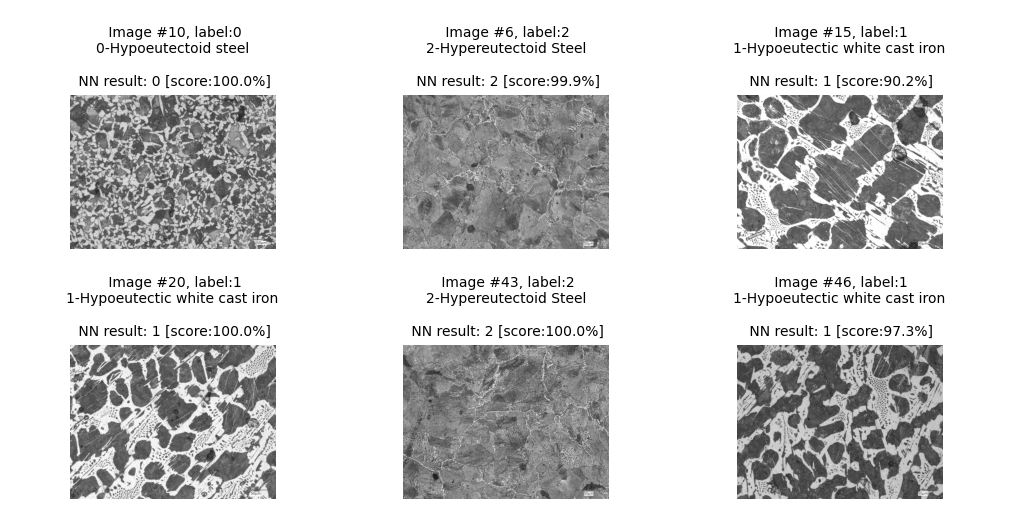

In [37]:
fig, axes = plt.subplots(2, 3, layout="constrained")
fig.set_size_inches((10,5))

for axis, n in zip(axes.flatten(), (10, 6, 15, 20, 43, 46)):
    results = model.predict(x_test[n:n+1])
    answer = results.argmax()

    axis.imshow(x_test[n], cmap='gray')
    title = f'\n Image #{n}, label:{lab_test[n]}\n{label_text[lab_test[n]]}'
    title += f'\n\n NN result: {answer} [score:{results[0, answer]*100:.1f}%]'
    axis.set_title(title, fontsize=10)
    axis.axis('off')
    axis.axis('equal')  